# **<span style="background: linear-gradient(to right, green, white, yellow); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">Breast Cancer Model</span>**




The breast cancer model is built using a dataset that contains patient records from a 1984-1989 trial conducted by the German Breast Cancer Study Group (GBSG). The dataset consists of 686 observations and 11 variables.

Here is a description of the dataset columns:

- pid: patient identifier
- age: age in years
- meno: menopausal status (0=premenopausal, 1=postmenopausal)
- size: tumor size in mm
- grade: tumor grade
- nodes: number of positive lymph nodes
- pgr: progesterone receptors (fmol/l)
- er: estrogen receptors (fmol/l)
- hormon: hormonal therapy (0=no, 1=yes)
- rfstime: recurrence-free survival time; days to first of recurrence, death, or last follow-up
- status: patient status (0=alive without recurrence, 1=recurrence or death)

The dataset is used in the paper by Royston and Altman (2013) for external validation of a Cox prognostic model. The Rotterdam data is used to create a fitted model, while the GBSG data is used for model validation. The paper provides references for the data source.

References:
Patrick Royston and Douglas Altman, External validation of a Cox prognostic model: principles and methods. BMC Medical Research Methodology 2013, 13:33

## **<span style="color: green">Import Libraries</span>**

In [38]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Neural network Libraries for FNN
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping

## **<span style="color: green">Data Manipulation and Analysis</span>**

In [39]:
#load data set
breast_cancer_data = pd.read_csv('../Datasets/gbsg.csv')

#check dataset info 
breast_cancer_data.info()

#check first 5 rows of the dataset
breast_cancer_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  686 non-null    int64
 1   pid         686 non-null    int64
 2   age         686 non-null    int64
 3   meno        686 non-null    int64
 4   size        686 non-null    int64
 5   grade       686 non-null    int64
 6   nodes       686 non-null    int64
 7   pgr         686 non-null    int64
 8   er          686 non-null    int64
 9   hormon      686 non-null    int64
 10  rfstime     686 non-null    int64
 11  status      686 non-null    int64
dtypes: int64(12)
memory usage: 64.4 KB


,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0


In [40]:
#discribe the dataset
breast_cancer_data.describe()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,343.500000,966.061224,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,198.175427,495.506249,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,1.000000,1.000000,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,172.250000,580.750000,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,343.500000,1015.500000,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,514.750000,1340.500000,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,686.000000,1819.000000,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


In [41]:
#drop that unnamed column 
breast_cancer_data.drop('Unnamed: 0', axis=1, inplace=True)

In [42]:
breast_cancer_data.columns

Index(['pid', 'age', 'meno', 'size', 'grade', 'nodes', 'pgr', 'er', 'hormon',
       'rfstime', 'status'],
      dtype='object')

In [43]:
# unique values in the dataset
breast_cancer_data['status'].unique()

# check value counts
breast_cancer_data['status'].value_counts()

status
0    387
1    299
Name: count, dtype: int64

## **<span style="color: green">Data Visualization</span>**


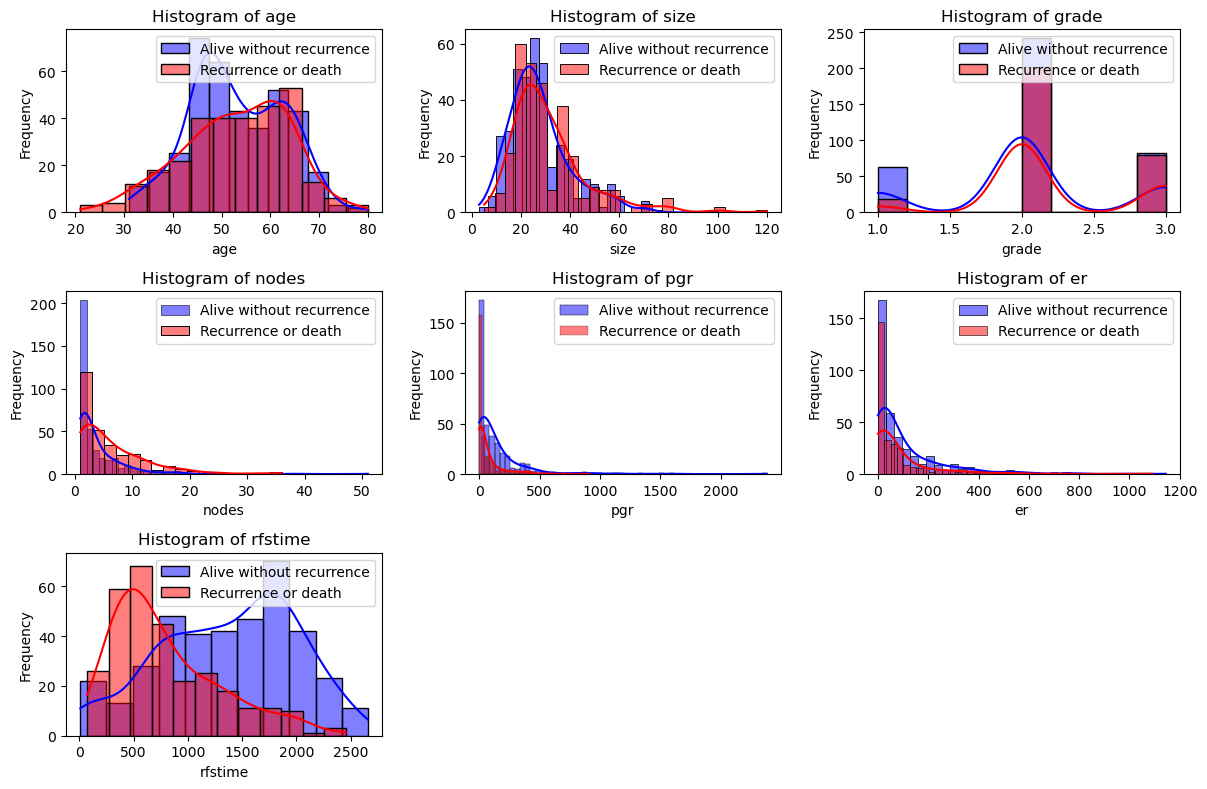

In [44]:
#create histograms of the dataset based on the status

#numerical features except the status and pid
numerical_features = ['age', 'size', 'grade', 'nodes', 'pgr', 'er', 'rfstime']

#ploting histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(breast_cancer_data[breast_cancer_data['status'] == 0][feature], color='blue', label='Alive without recurrence', kde=True)
    sns.histplot(breast_cancer_data[breast_cancer_data['status'] == 1][feature], color='red', label='Recurrence or death', kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

To analyze the histograms shown above, we can observe the distribution of various numerical features in the dataset based on the status of the patients. The histograms provide insights into the differences between patients who are alive without recurrence and those who have experienced recurrence or death.

Here are some key observations from the histograms:

1. Age: The histogram shows the distribution of patient ages. We can see that the majority of patients in both categories are between the ages of 40 and 70. However, there is a slightly higher frequency of younger patients (below 50) in the "Alive without recurrence" category compared to the "Recurrence or death" category.

2. Size: This histogram represents the tumor size. It indicates that smaller tumor sizes (around 0-20) are more common in patients who are alive without recurrence. On the other hand, larger tumor sizes (above 20) are more prevalent in patients who have experienced recurrence or death.

3. Grade: The histogram for tumor grade shows that most patients in both categories have a grade of 2. However, there is a higher frequency of grade 3 tumors in the "Recurrence or death" category compared to the "Alive without recurrence" category.

4. Nodes: This histogram represents the number of positive axillary lymph nodes. It shows that patients with a higher number of positive nodes (above 10) are more likely to experience recurrence or death. In contrast, patients with a lower number of positive nodes (below 10) are more likely to be alive without recurrence.

5. PGR, ER, and Rfstime: These histograms represent the Progesterone Receptor (PGR), Estrogen Receptor (ER), and Recurrence-Free Survival Time (Rfstime) variables, respectively. The distribution patterns for these variables do not show significant differences between the two categories.

Overall, these histograms provide valuable insights into the distribution of various features in the dataset and their relationship with the status of the patients. They can help in understanding the characteristics of patients who are more likely to experience recurrence or death, which can contribute to the development of a breast cancer prediction model.

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_9544\982377777.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


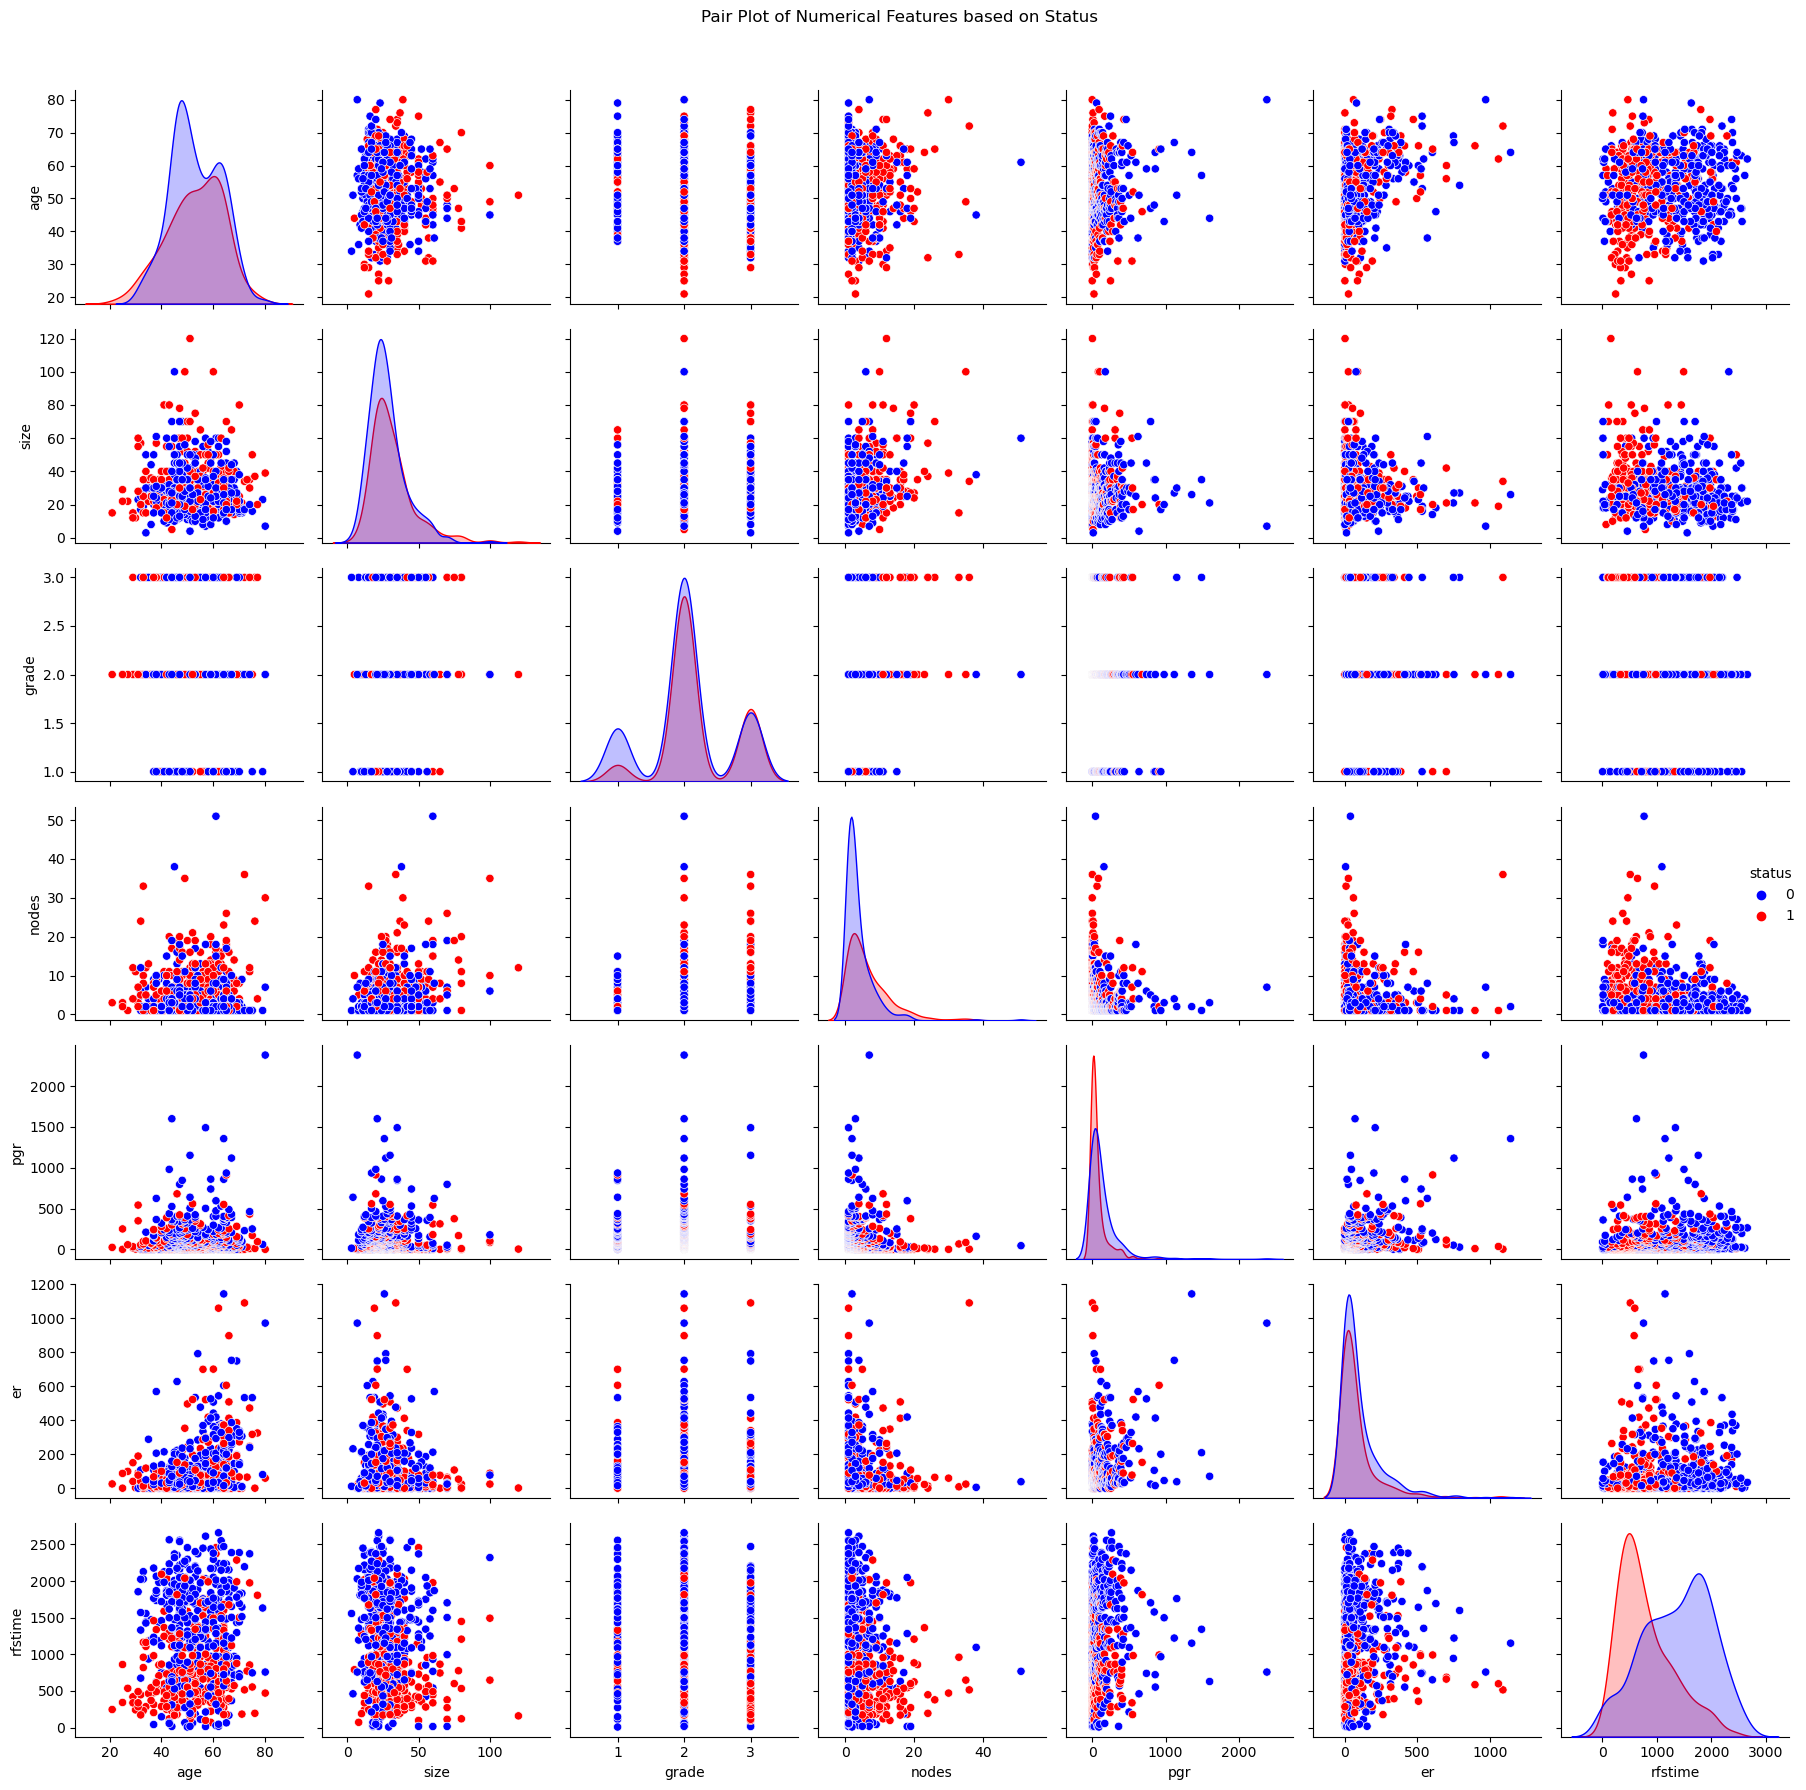

In [45]:
# # Pair plot of numerical features based on 'status'
sns.pairplot(breast_cancer_data, hue='status', vars=numerical_features, palette={0: 'blue', 1: 'red'})
plt.suptitle('Pair Plot of Numerical Features based on Status', y=1.02)
plt.tight_layout()
plt.show()

The pair plot shown above provides a visual representation of the relationships between different numerical features in the dataset based on the status of the patients. The pair plot is a matrix of scatter plots, where each scatter plot represents the relationship between two numerical features.

Here are some key observations from the pair plot:

1. Age vs. Size: The scatter plot shows a positive correlation between age and tumor size. As age increases, the tumor size tends to be larger. This relationship is consistent for both patients who are alive without recurrence and those who have experienced recurrence or death.

2. Age vs. Grade: The scatter plot indicates that there is no strong correlation between age and tumor grade. The distribution of tumor grades is relatively similar across different age groups.

3. Age vs. Nodes: The scatter plot suggests that there is no significant correlation between age and the number of positive axillary lymph nodes. The distribution of positive nodes is relatively similar across different age groups.

4. Age vs. PGR, ER, Rfstime: The scatter plots for PGR, ER, and Rfstime variables show no clear correlation with age. The distribution patterns of these variables do not vary significantly across different age groups.

5. Size vs. Grade: The scatter plot demonstrates a positive correlation between tumor size and grade. Larger tumor sizes tend to have higher grades. This relationship is consistent for both patients who are alive without recurrence and those who have experienced recurrence or death.

6. Size vs. Nodes: The scatter plot indicates a positive correlation between tumor size and the number of positive axillary lymph nodes. Larger tumor sizes tend to have a higher number of positive nodes. This relationship is consistent for both patients who are alive without recurrence and those who have experienced recurrence or death.

7. Size vs. PGR, ER, Rfstime: The scatter plots for PGR, ER, and Rfstime variables show no clear correlation with tumor size. The distribution patterns of these variables do not vary significantly across different tumor sizes.

8. Grade vs. Nodes: The scatter plot suggests a positive correlation between tumor grade and the number of positive axillary lymph nodes. Higher-grade tumors tend to have a higher number of positive nodes. This relationship is consistent for both patients who are alive without recurrence and those who have experienced recurrence or death.

9. Grade vs. PGR, ER, Rfstime: The scatter plots for PGR, ER, and Rfstime variables show no clear correlation with tumor grade. The distribution patterns of these variables do not vary significantly across different tumor grades.

10. Nodes vs. PGR, ER, Rfstime: The scatter plots for PGR, ER, and Rfstime variables show no clear correlation with the number of positive axillary lymph nodes. The distribution patterns of these variables do not vary significantly across different numbers of positive nodes.

Overall, the pair plot provides insights into the relationships between different numerical features in the dataset and their potential impact on the status of the patients. These visualizations can help in identifying patterns and trends that can be further explored in the development of the breast cancer prediction model.

## **<span style="color: green">Model Training</span>**

**<span style="color: green">Split Train Test and Normalization</span>**

In [46]:
# Separate the features and the target variable into X-->features and Y-->target
X = breast_cancer_data.drop('status', axis=1)
Y = breast_cancer_data['status']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
#Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train.shape

(548, 10)

In [49]:
X_train[:5]

array([[-0.09727543,  1.30447609,  0.87946733,  0.76065796,  1.49907986,
         1.95844143, -0.43528951,  2.11844641, -0.74620251, -0.27830648],
       [ 1.44866781,  0.12792489,  0.87946733, -0.09308615,  1.49907986,
        -0.17804013, -0.53664867, -0.63191786, -0.74620251, -0.7676513 ],
       [-0.78190743, -0.46035071, -1.1370519 , -0.66224889,  1.49907986,
         0.35608026, -0.54171662, -0.64533427, -0.74620251, -0.53455645],
       [ 0.10751186,  1.79470576,  0.87946733, -0.59110355, -0.21594261,
         0.71216052, -0.54171662, -0.64533427,  1.34011879, -1.45304277],
       [-0.04708246, -0.06816697,  0.87946733,  0.40493125, -0.21594261,
         2.84864208, -0.48596909, -0.26296655,  1.34011879, -0.41106249]])

**Logistic Regression Model**

The logistic regression model is a statistical method used for binary classification tasks. It is commonly used to predict the probability of a binary outcome based on one or more predictor variables. In the context of breast cancer prediction, the logistic regression model can be trained to predict the likelihood of recurrence or death based on patient characteristics such as age, tumor size, tumor grade, number of positive lymph nodes, and other relevant features.

In [50]:
#logistic regression model
logistic_model = LogisticRegression()

In [51]:
#fit the model
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_test)

In [52]:
#test the model
Y_pred[:5]

array([0, 1, 0, 0, 0], dtype=int64)

The logistic regression model uses the logistic function to model the relationship between the predictor variables and the binary outcome. The logistic function maps any real-valued number to the range [0, 1], which can be interpreted as a probability. The model estimates the probability of the binary outcome (e.g., recurrence or death) based on the input features.

**Deep Neural Network (DNN) Model**

In [53]:
#create Deep Neural Network model
early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=10, 
    restore_best_weights=True,
)
# Create the model
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(56, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [54]:
# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [55]:
history = model.fit(X_train,Y_train,
                                epochs=100,
                                validation_data=(X_test, Y_test),
                                callbacks=[early_stopping])

Epoch 1/100
18/18 [==============================] - 10s 41ms/step - loss: 0.6640 - accuracy: 0.5821 - val_loss: 0.6176 - val_accuracy: 0.6087
Epoch 2/100
18/18 [==============================] - 0s 15ms/step - loss: 0.6020 - accuracy: 0.6989 - val_loss: 0.5523 - val_accuracy: 0.7319
Epoch 3/100
18/18 [==============================] - 0s 15ms/step - loss: 0.5554 - accuracy: 0.7281 - val_loss: 0.5248 - val_accuracy: 0.7391
Epoch 4/100
18/18 [==============================] - 0s 13ms/step - loss: 0.5273 - accuracy: 0.7664 - val_loss: 0.4968 - val_accuracy: 0.7536
Epoch 5/100
18/18 [==============================] - 0s 19ms/step - loss: 0.5091 - accuracy: 0.7518 - val_loss: 0.4930 - val_accuracy: 0.7609
Epoch 6/100
18/18 [==============================] - 0s 15ms/step - loss: 0.4857 - accuracy: 0.7682 - val_loss: 0.4807 - val_accuracy: 0.7754
Epoch 7/100
18/18 [==============================] - 0s 15ms/step - loss: 0.4842 - accuracy: 0.7792 - val_loss: 0.4819 - val_accuracy: 0.7681
Epoch

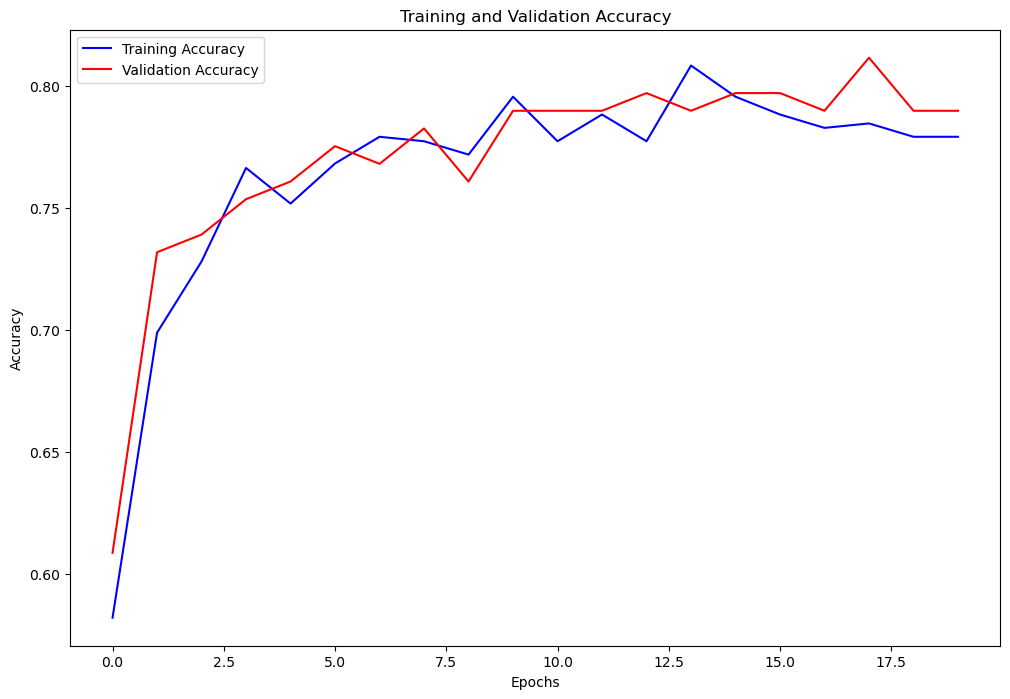

In [56]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Axes: >

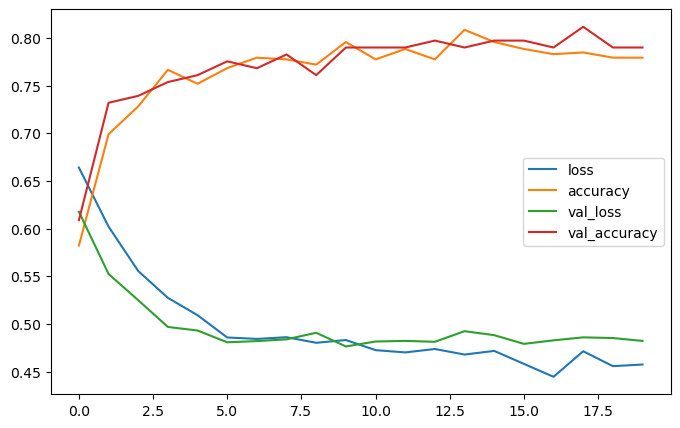

In [57]:
#print the model summary
pd.DataFrame(history.history).plot(figsize=(8, 5))

## **<span style="color: green">Model Evaluation</span>**

In [58]:
# Evaluate the model
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7899


[0.47631382942199707, 0.7898550629615784]

In [59]:
# Predictions
Y_pred = model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


In [60]:
# Convert the predictions to binary
Y_pred = np.round(Y_pred).astype(int)
y_pred = Y_pred.flatten()
y_pred[:5]

array([0, 1, 1, 0, 0])

In [61]:
# Classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        68
           1       0.83      0.74      0.78        70

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138



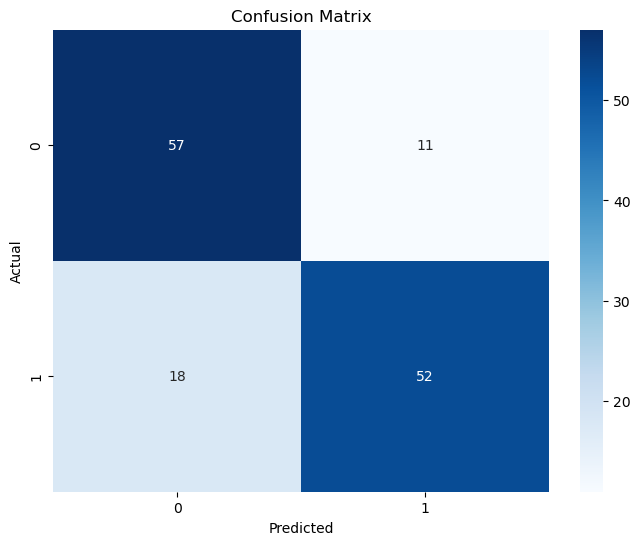

In [62]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
# Accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 78.99%


In [64]:
#save the model
model.save('../Models/breast_cancer_model.h5')

d:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **<span style="color: green">Conclusion</span>**

The breast cancer prediction model developed in this notebook demonstrates the use of logistic regression and deep neural network (DNN) models to predict the likelihood of recurrence or death based on patient characteristics. The model training process involves data preprocessing, feature selection, model training, and evaluation using performance metrics such as accuracy, precision, recall, and F1 score.

In [84]:
#function to test the model
def test_model(model, X_test, Y_test):
    # Predictions
    Y_pred = model.predict(X_test)

    # Convert the predictions to binary
    Y_pred = np.round(Y_pred).astype(int)
    y_pred = Y_pred.flatten()

    # Classification report
    print(classification_report(Y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(Y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Accuracy score
    accuracy = accuracy_score(Y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        68
           1       0.83      0.74      0.78        70

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138



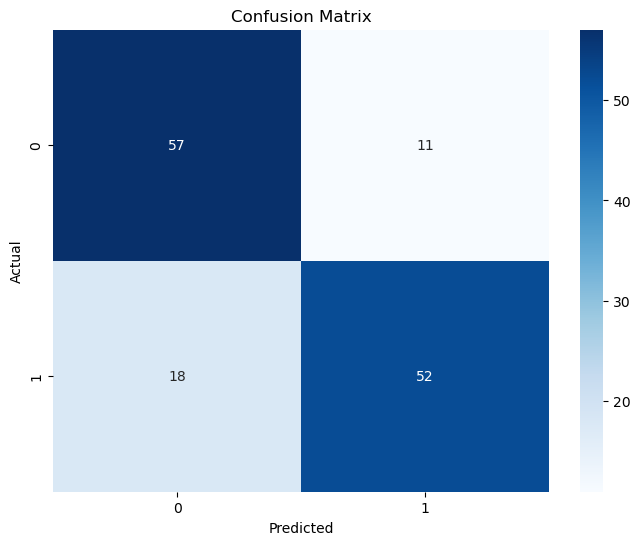

Accuracy: 78.99%


In [85]:
#test the model
test_model(model, X_test, Y_test)